In [4]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:

image=cv2.imread("output_final/cropped_img.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

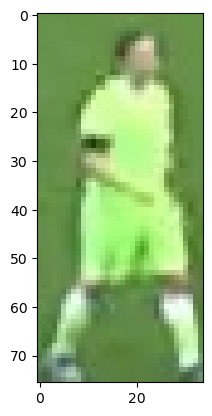

In [5]:
plt.imshow(image)

In [8]:
##since we only need the color of tshirt and it is present in the top half portion only , so we crop it
image.shape

(76, 34, 3)

In [10]:
img_half=image[0:int(image.shape[0]/2), :]

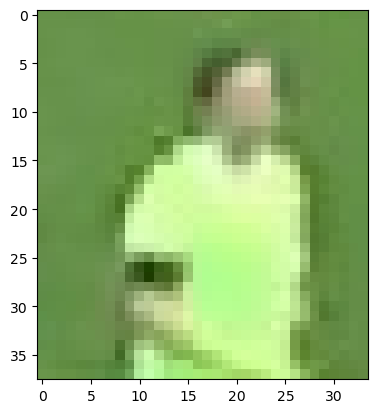

In [11]:
plt.imshow(img_half)

In [12]:
#Cluster the image

In [24]:
image_2d=img_half.reshape((-1,3)) # final shape is (height*weight, 3) from (height,weight,3)
image_2d = np.float32(image_2d)

In [26]:
kmeans = KMeans(n_clusters=2, random_state=0, algorithm="elkan", n_init=10)
kmeans.fit(image_2d)

labels=kmeans.labels_
#reshape the labels into original image shape
clustered_image=labels.reshape(img_half.shape[0],image.shape[1])

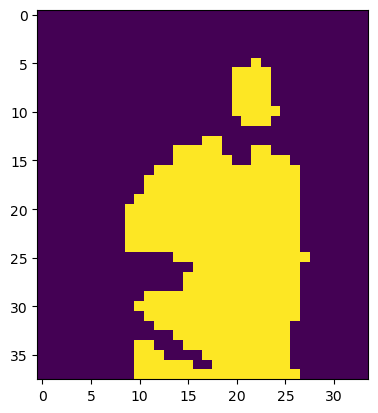

In [27]:
plt.imshow(clustered_image)

In [31]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)


0


In [32]:
player_cluster=1-non_player_cluster

In [33]:
print(player_cluster)

1


In [35]:
a=kmeans.cluster_centers_[player_cluster]

In [36]:
a[1]

240.48672

In [37]:
a[2]

153.65881